# Glass Identification Data Set
<font color="red">
Name: <strong> Dimitrija Timeski</strong></font>
<br>

<font color="orange">
Index:  <strong>203235</strong>
</font>

Data from: https://archive.ics.uci.edu/ml/datasets/Glass+Identification

# Loading the Data

```
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
```



In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MU/Lab_1/glass.data",
                   names=["index", "Refractive index", "Sodium", "Magnesium", "Aluminum", "Silicon", "Potassium", "Calcium", "Barium", "Iron", "target"])
data.head()


,index,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Preprocessing

In [ ]:
data.isna().sum()

index               0
Refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
target              0
dtype: int64

In [ ]:
data.drop(["index"], axis=1, inplace=True)
data.head()

,Refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations 

##histograms

<Axes: >

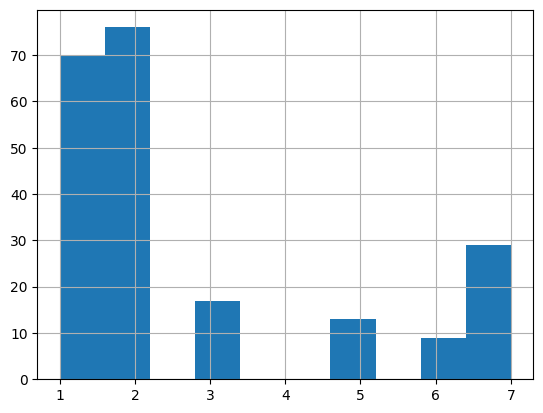

In [ ]:
data['target'].hist()

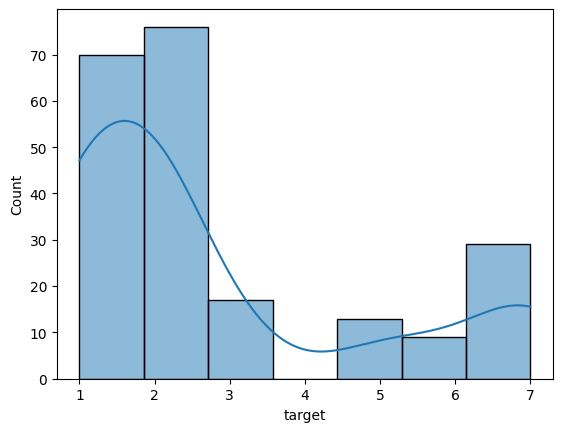

In [ ]:
line = sns.histplot(data['target'], bins=7, kde=True)

##scatterplots

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8')])

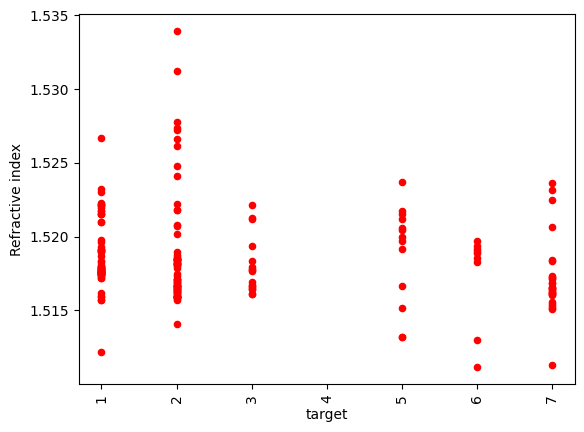

In [ ]:
data.plot.scatter(x='target', y='Refractive index', c="red")
plt.xticks(rotation=90)

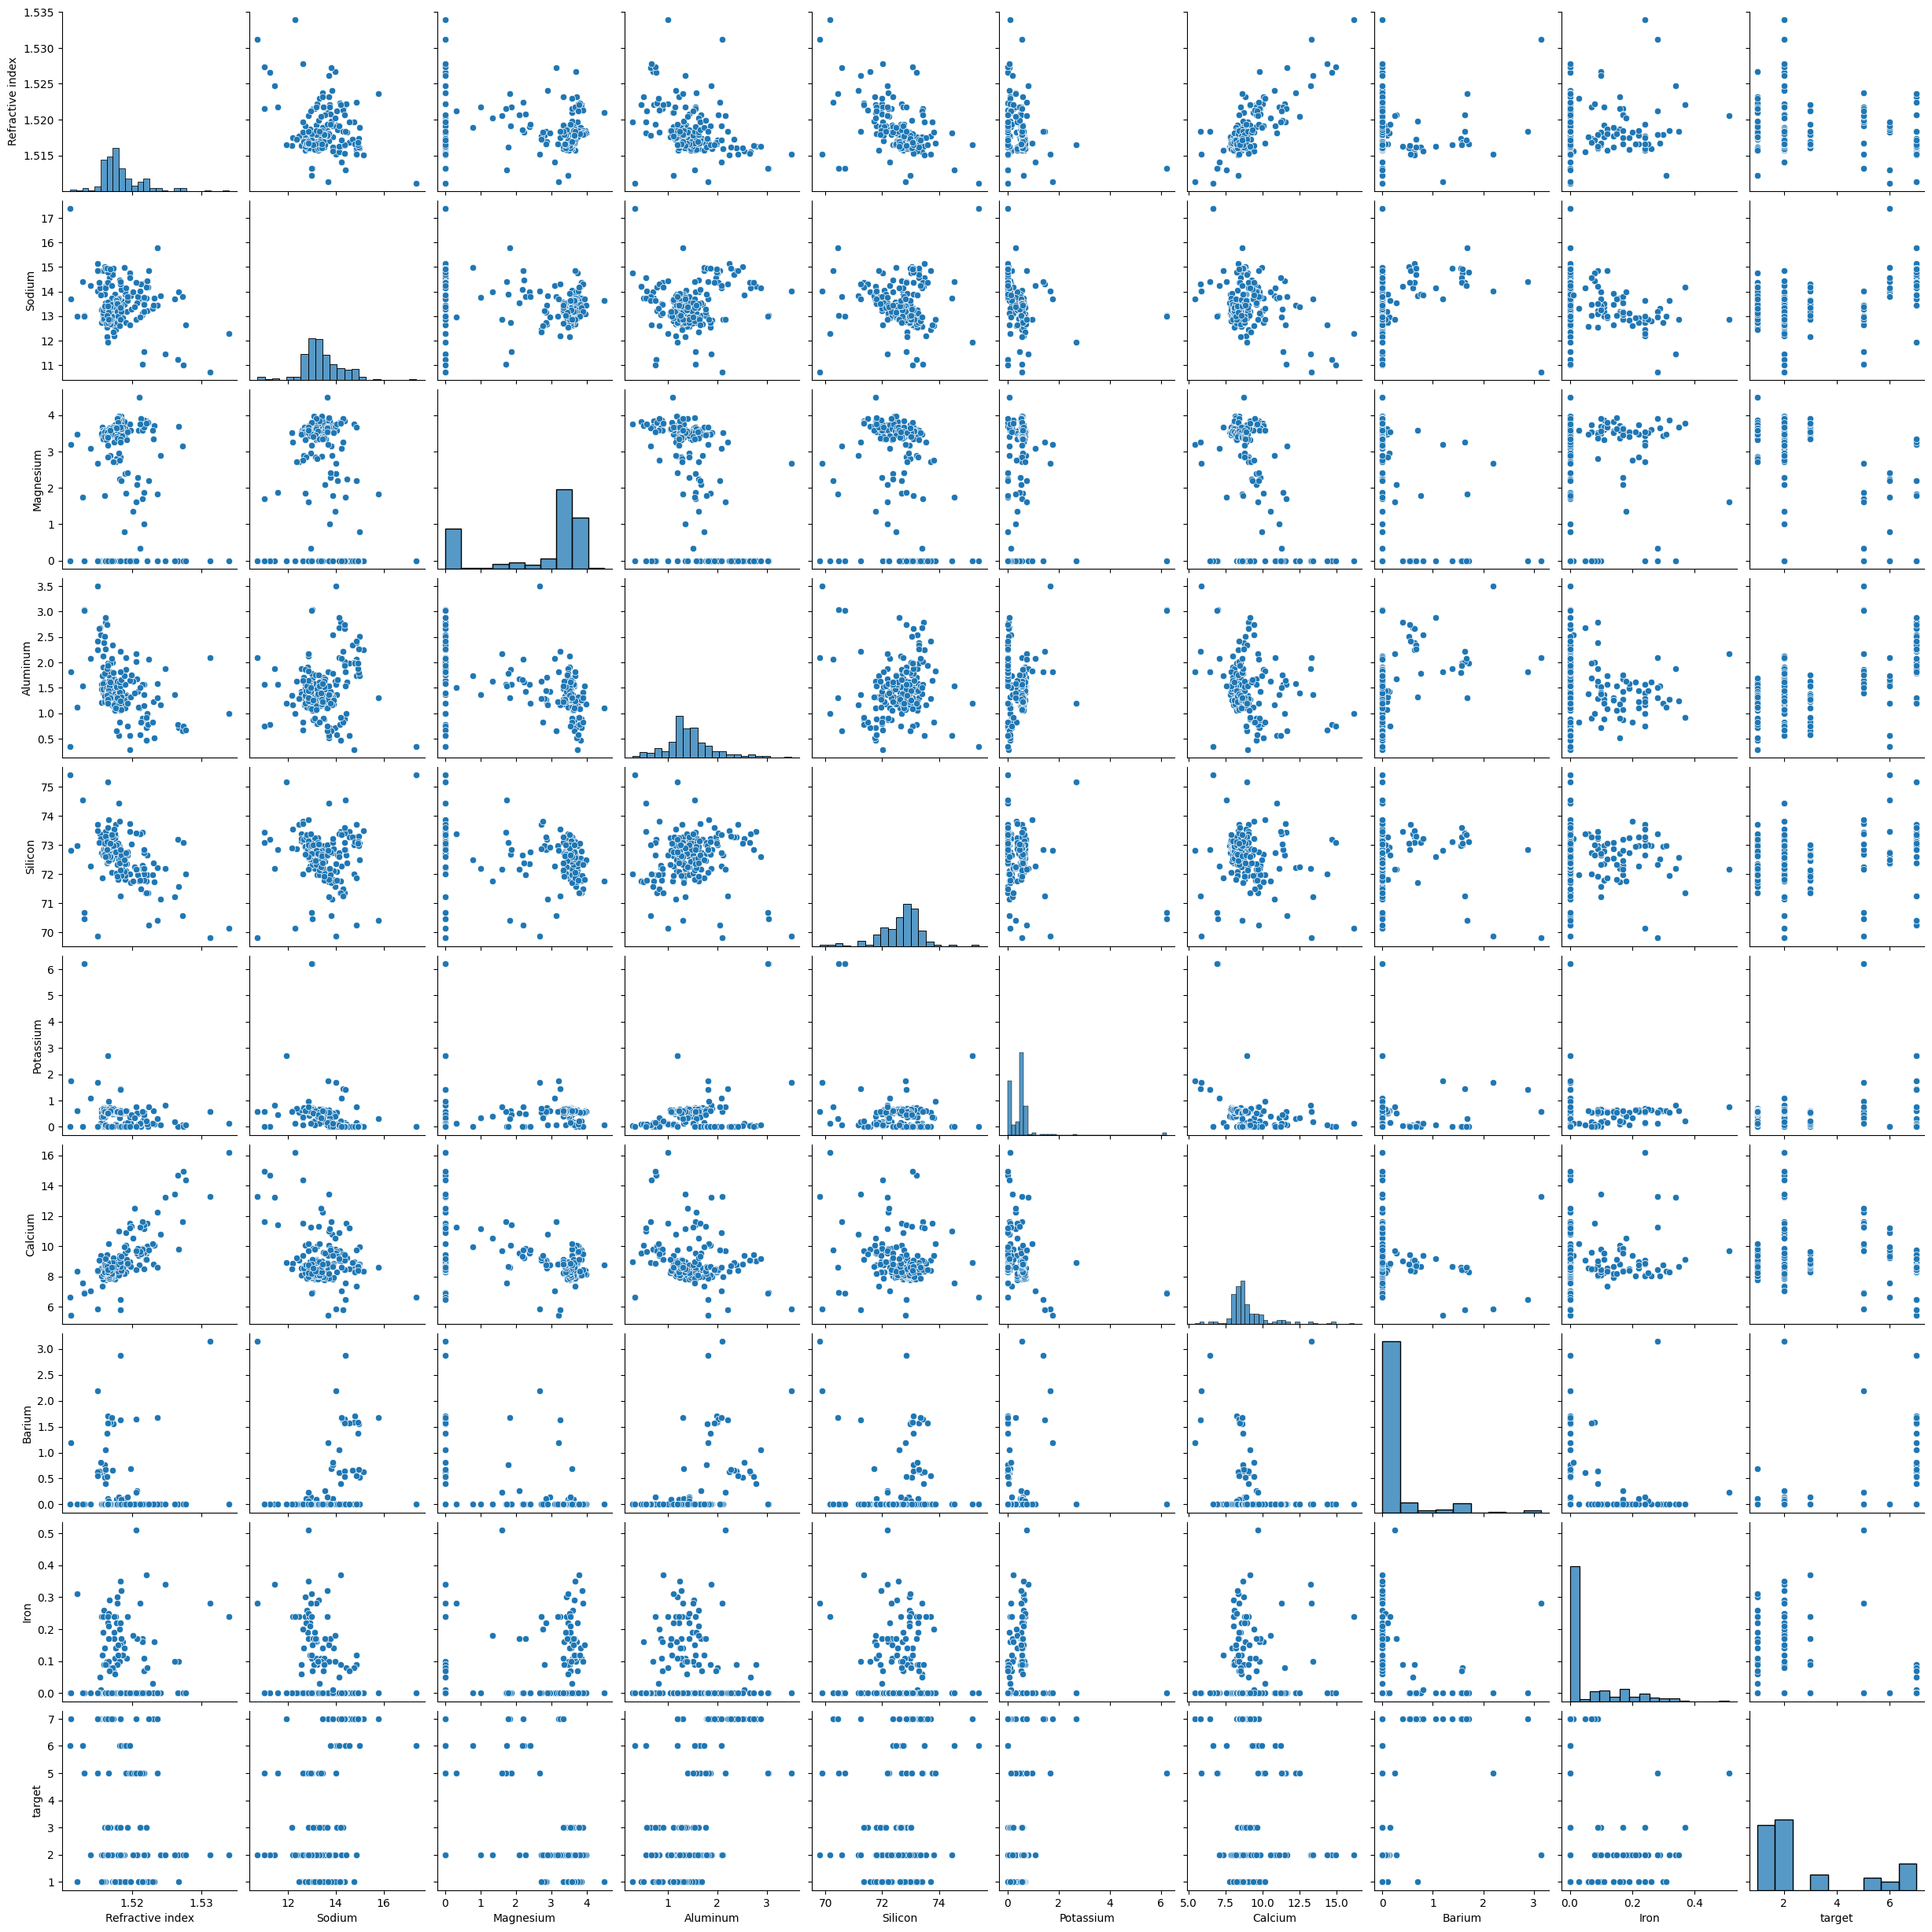

In [ ]:
sns.pairplot(data)

##feature correlations

<Axes: >

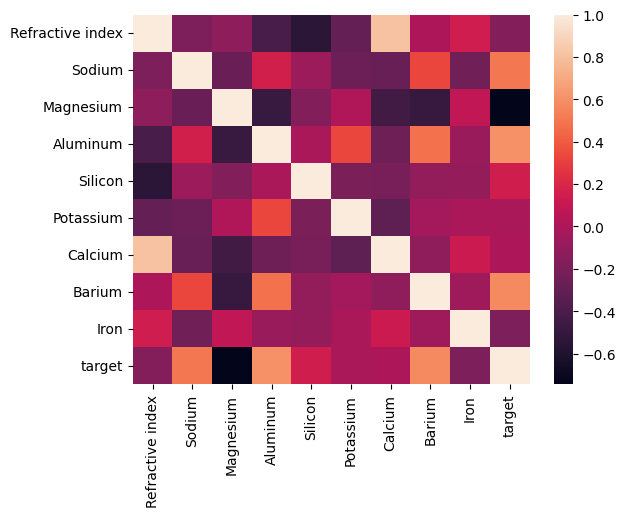

In [ ]:
sns.heatmap(data.corr())

# Naïve Bayes

In [ ]:
nb_data = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(nb_data[nb_data.columns[:-1]], nb_data["target"], test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print('Naïve Accuracy:', accuracy)

Naïve Accuracy: 0.6046511627906976


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72        19
           2       0.50      0.20      0.29        10
           3       0.22      0.67      0.33         3
           5       0.00      0.00      0.00         2
           6       0.80      1.00      0.89         4
           7       0.80      0.80      0.80         5

    accuracy                           0.60        43
   macro avg       0.50      0.57      0.50        43
weighted avg       0.61      0.60      0.58        43



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(Y_test, y_pred))

[[14  1  4  0  0  0]
 [ 5  2  3  0  0  0]
 [ 0  0  2  0  1  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  4  0]
 [ 1  0  0  0  0  4]]


#Linear Discriminant Analysis (LDA)

## LDA

In [ ]:
lda_data = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(lda_data[lda_data.columns[:-1]], lda_data["target"], test_size=0.2)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lda = LDA()
lda.fit(X_train, Y_train)

y_pred = lda.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print('LDA Accuracy:', accuracy)

LDA Accuracy: 0.627906976744186


##LDA + NB

In [ ]:
lda_and_nb_data = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(lda_and_nb_data[lda_and_nb_data.columns[:-1]], lda_and_nb_data["target"], test_size=0.2)

In [ ]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_lda, Y_train)

y_pred = gnb.predict(X_test_lda)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print('Naive Bayes + LDA Accuracy:', accuracy)

Naive Bayes + LDA Accuracy: 0.6744186046511628


#Quadratic Discriminant Analysis (QDA)

In [ ]:
qda_data = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(qda_data[qda_data.columns[:-1]], qda_data["target"], test_size=0.2)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [ ]:
qda = QDA()
qda.fit(X_train, Y_train)

y_pred = qda.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print('LDA Accuracy:', accuracy)

LDA Accuracy: 0.046511627906976744
